Name : Nishita Vaid

Enrollment No. : A525117722007

#Fruit 360 Data _ KNN, PCA AND SVM - ASSIGNMENT

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd /content/drive/MyDrive/Dataset

/content/drive/MyDrive/Dataset


Connecting to kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nishitavaid","key":"e2998de595de3ac641374dc316b730fa"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!rm kaggle.json

Downloading fruit 360 dataset from kaggle

In [ ]:
!kaggle datasets download -d moltean/fruits

100% 1.28G/1.28G [00:18<00:00, 95.3MB/s]
100% 1.28G/1.28G [00:18<00:00, 73.6MB/s]


Extracting fruit 360 dataset

In [ ]:
from zipfile import ZipFile
fruit360="/content/drive/MyDrive/Dataset/fruits.zip"

with ZipFile(fruit360,'r') as zip:
  zip.extractall()
  print('Done')

Done


Converting image 1 to array

In [ ]:
# For single image
from PIL import Image
import numpy as np

i1 = Image.open('/content/drive/MyDrive/Dataset/fruits-360_dataset/fruits-360/Test/Apple Braeburn/321_100.jpg')

imgToMat = np.asarray(i1)

print(imgToMat.shape)

(100, 100, 3)


Converting training dataset to csv

In [ ]:
import os
from numpy import asarray
import pandas as pd
from PIL import Image

f1=[]
f2=[]
img_dir="/content/drive/MyDrive/Dataset/fruits-360-original-size/fruits-360-original-size/Training"
for root,dirs,files in os.walk(img_dir):
  for name in files:
    fruit1 = os.path.join(root,name)
    n1 = os.path.normpath(fruit1)
    p1 = n1.split(os.sep)
    f2.append(p1[8])
    img1 = Image.open(fruit1)
    img1 = img1.resize((28,28),Image.NEAREST)
    imgGray = img1.convert('L')
    arr1 = asarray(imgGray)
    arr1_new = arr1.flatten()
    l1 = arr1_new.tolist()
    f1.append(l1)

len(f1)

6231

In [ ]:
import pandas as pd

df = pd.DataFrame(f1)
df['label']=f2
df

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,apple_6
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,apple_6
2,255,255,255,255,255,255,253,150,149,147,...,255,255,255,255,255,255,255,255,255,apple_6
3,255,255,255,255,255,255,254,149,149,146,...,255,254,255,255,255,255,255,255,255,apple_6
4,255,255,255,255,254,254,253,152,149,146,...,255,254,255,255,255,255,255,255,255,apple_6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6226,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,zucchini_dark_1
6227,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,zucchini_dark_1
6228,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,zucchini_dark_1
6229,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,zucchini_dark_1


In [ ]:
df.to_csv("/content/drive/MyDrive/Dataset/fruit_taining_data.csv",index = False)

Converting testing dataset to csv

In [ ]:
f3=[]
f4=[]
img_dir1="/content/ drive/MyDrive/Dataset/fruits-360-original-size/fruits-360-original-size/Test"
for root,dirs,files in os.walk(img_dir1):
  for name1 in files:
    fruit2 = os.path.join(root,name1)
    n2 = os.path.normpath(fruit2)
    p2 = n2.split(os.sep)
    f4.append(p2[8])
    img2 = Image.open(fruit2)
    img2 = img2.resize((28,28),Image.NEAREST)
    imgGray1 = img2.convert('L')
    arr2 = asarray(imgGray1)
    arr2_new = arr2.flatten()
    l2 = arr2_new.tolist()
    f3.append(l1)

len(f3)

3110

In [ ]:
df1 = pd.DataFrame(f3)
df1['label']=f4
df1

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,apple_6
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,apple_6
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,apple_6
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,apple_6
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,apple_6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3105,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,zucchini_dark_1
3106,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,zucchini_dark_1
3107,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,zucchini_dark_1
3108,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,zucchini_dark_1


In [ ]:
df1.to_csv("/content/drive/MyDrive/Dataset/fruit_test_data.csv",index = False)

# Classification Algorithms:

1. K-Nearest Neighbor

2. SVM Classifier

# Data Visualization:

1. Principal Component Analysis

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import seaborn as sns
import random

from tqdm import tqdm

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from random import randint

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Read data from two files train.csv and test.csv

In [6]:
fruit_train = pd.read_csv("/content/drive/MyDrive/Dataset/fruit_taining_data.csv")
fruit_test  = pd.read_csv("/content/drive/MyDrive/Dataset/fruit_test_data.csv")

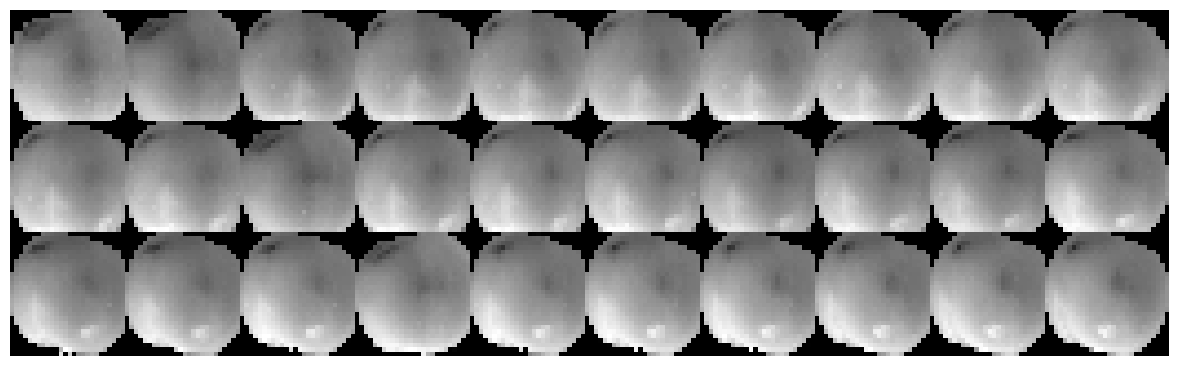

In [7]:
# VISUALIZE DATA
samples = fruit_train.iloc[0:30,:784].values
plt.figure(figsize=(15,4.5))
for i in range(30):  
    plt.subplot(3, 10, i+1)
    plt.imshow(samples[i].reshape((28,28)),cmap=plt.cm.binary)
    plt.axis('off')
plt.subplots_adjust(wspace=-0.1, hspace=-0.1)
plt.show()

In [8]:
fruit_train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,apple_6
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,apple_6
2,255,255,255,255,255,255,253,150,149,147,...,255,255,255,255,255,255,255,255,255,apple_6
3,255,255,255,255,255,255,254,149,149,146,...,255,254,255,255,255,255,255,255,255,apple_6
4,255,255,255,255,254,254,253,152,149,146,...,255,254,255,255,255,255,255,255,255,apple_6


In [9]:
print(fruit_train.shape, fruit_test.shape)

(6231, 785) (3110, 785)


# Checking whether data is balanced or imbalanced

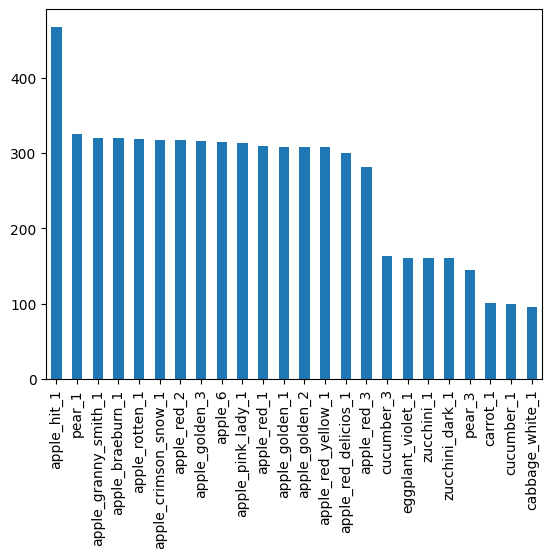

In [10]:
_ = fruit_train['label'].value_counts().plot(kind='bar')
plt.show()

**From above figure one can conclude that dataset is balanced.**

In [11]:
X_raw = fruit_train.drop(['label'], axis = 1, inplace = False)
y = fruit_train['label']

In [12]:
arr = X_raw.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(arr)
X = pd.DataFrame(x_scaled)

In [13]:
X.max()

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
779    1.0
780    1.0
781    1.0
782    1.0
783    1.0
Length: 784, dtype: float64

#Principal Component Analysis for data visualization

we convert 784 dimensional data into 2 dimensional to visualize the data in 2D

In [14]:
pca = PCA(n_components = 2)
principal_components = pca.fit_transform(X)
principal_DF = pd.DataFrame(data = principal_components, columns = ['component1', 'component2'])
final_DF = pd.concat( [principal_DF, fruit_train[['label']]], axis = 1)

['#10AEFD', '#DB9758', '#F71252', '#07981E', '#6985B5', '#ECD75A', '#FB8B34', '#8E1730', '#52099B', '#119D58', '#FAEC7F', '#A7D1D6', '#26F52E', '#7FFF90', '#B8E9C8', '#16D018', '#D73E2B', '#470247', '#B5CD44', '#C361DC', '#D7AFEA', '#913668', '#864EF3', '#E9E5C5']


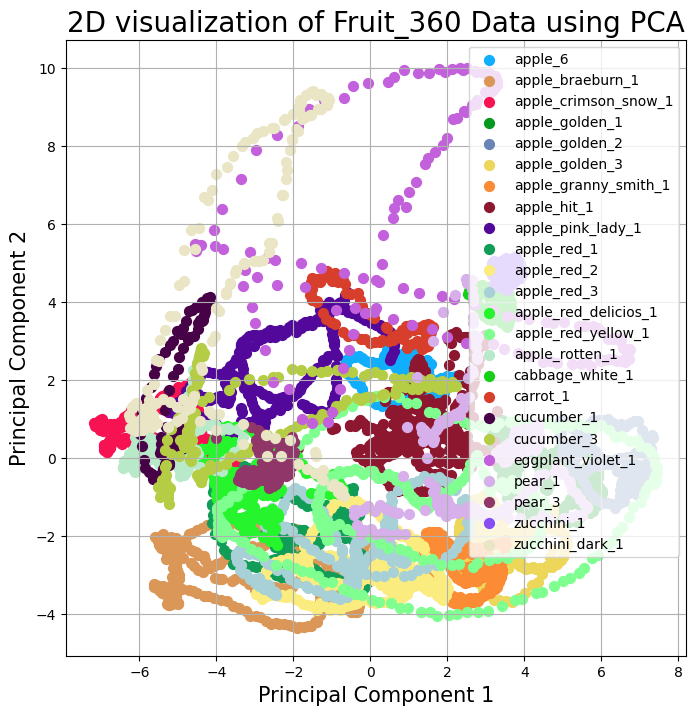

In [15]:
fig = plt.figure(figsize = (8,8))
ax = plt.subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2D visualization of Fruit_360 Data using PCA', fontsize = 20)

targets = list(fruit_train['label'].unique())
random.seed(10)
colors = []
for i in range(24):
    colors.append('#%06X' % randint(0, 0xFFFFFF))
print(colors)
for target, color in zip(targets,colors):
    indicesToKeep = final_DF['label'] == target
    ax.scatter(final_DF.loc[indicesToKeep, 'component1'], final_DF.loc[indicesToKeep,'component2'], c = color, s=50)
ax.legend(targets)
ax.grid()

#Divide data into 3 parts

1. Train - To calculate nearest neighbors

2. cross-validation: To find optimal value of k (Hyperparameter)

3. Test: To test final accuracy of the model

In [16]:
X_1, X_test, y_1, y_test = train_test_split(X,y,test_size = 0.25, random_state = 10)
X_train, X_cv, y_train, y_cv = train_test_split(X_1,y_1,test_size = 0.20, random_state = 10)
print(X_train.shape, X_test.shape, X_cv. shape, y_train.shape, y_test.shape, y_cv.shape)

(3738, 784) (1558, 784) (935, 784) (3738,) (1558,) (935,)


#**KNN Classifier**

In [17]:
def trainKNN(X_train, y_train, k): 
    """Function to train model using KNN classifier
    Takes argumenst as training dataset, k-value and returns classifier
    """
    classifier = KNeighborsClassifier(n_neighbors=k, n_jobs = -1)
    classifier.fit(X_train,y_train)
    return classifier

In [18]:
def predictClassifier(X_test, classifier):
    """Function to predict labels using classifier
       Takes argumenst as test/cv dataset, and returns predicted values by model
    """
    y_pred = classifier.predict(X_test)
    return y_pred

In [19]:
def calculateAccuracy(y_pred, y_test):
    """Function to check accuracy of the model. Takes input arguments as actual and predicted values
       and returns accuracy score
    """
    accuracy = accuracy_score(y_pred, y_test)
    return accuracy

In [20]:
%%time
kvalues = [x for x in range(1,50, 6)]
AccuracyList = []
for k in tqdm(kvalues):
    knnClassifier = trainKNN(X_train, y_train, k)
    y_pred = predictClassifier(X_cv, knnClassifier)
    acc = calculateAccuracy(y_pred, y_cv)
    AccuracyList.append(acc)

100%|██████████| 9/9 [00:02<00:00,  3.19it/s]

CPU times: user 4.7 s, sys: 47.8 ms, total: 4.75 s
Wall time: 2.84 s


In [21]:
AccuracyList

[1.0,
 0.9978609625668449,
 0.9871657754010695,
 0.9529411764705882,
 0.9144385026737968,
 0.8866310160427807,
 0.8577540106951872,
 0.8352941176470589,
 0.8149732620320855]

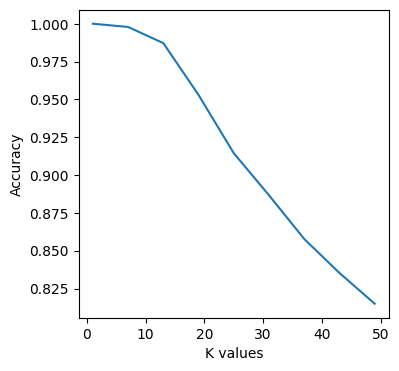

In [22]:
f = plt.figure(figsize = (4,4))
ax = plt.subplot()
plt.plot(kvalues,AccuracyList)
ax.set_xlabel('K values', fontsize = 10)
ax.set_ylabel('Accuracy', fontsize = 10)
plt.show()

In [23]:
%%time
# Wall time: 3min 49s
clf = trainKNN(X_train,y_train, 7)
y_pred = predictClassifier(X_test, knnClassifier)
acc = calculateAccuracy(y_pred, y_test)
print("Final Accuracy: ",acc)

Final Accuracy:  0.824775353016688
CPU times: user 840 ms, sys: 0 ns, total: 840 ms
Wall time: 461 ms


################# Confusion Matrix ####################


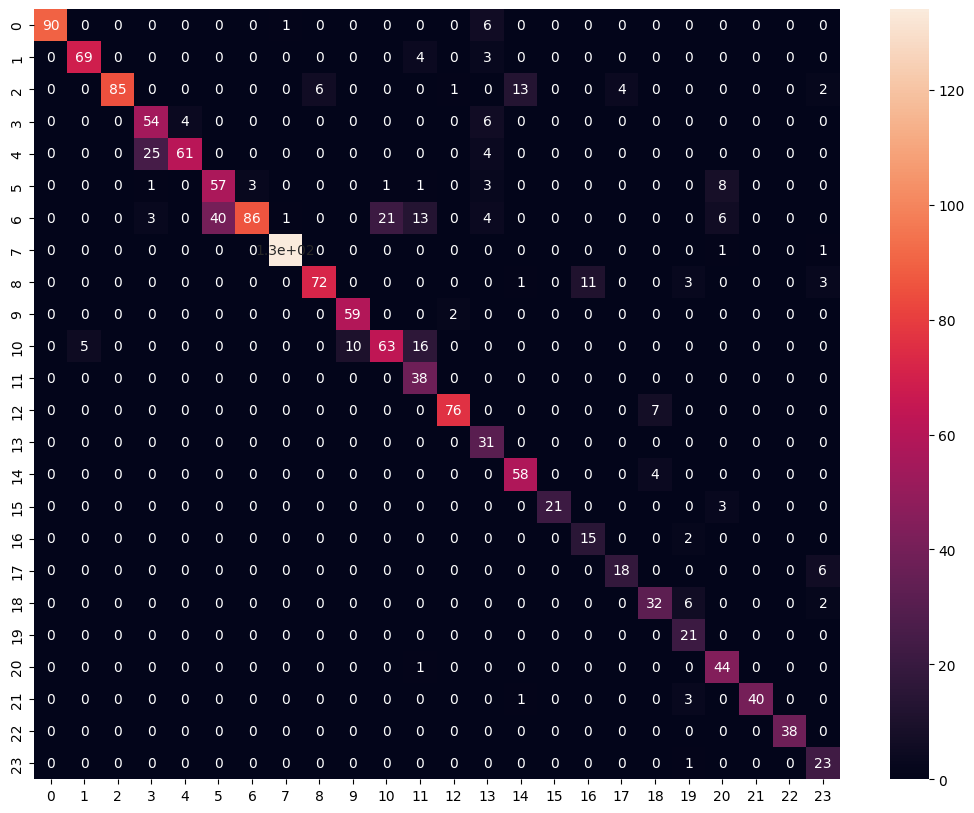

In [24]:
num_digits= np.unique(y)
cf = confusion_matrix(y_pred,y_test, labels = num_digits )
print("################# Confusion Matrix ####################")
fig = plt.figure(figsize = (13,10))
ax= plt.subplot()
sns.heatmap(cf, annot=True,   ax = ax);

#**PCA, KNN and SVM on a small sample of Fruit 360 DATASET**

Now selecting small dataset from given data to perform SVM.
Reason: It takes around almost 8 hours to run SVM on this huge dataset, so we select small portion of it.

In [25]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/Dataset/fruit_taining_data.csv")

In [46]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,apple_6
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,apple_6
2,255,255,255,255,255,255,253,150,149,147,...,255,255,255,255,255,255,255,255,255,apple_6
3,255,255,255,255,255,255,254,149,149,146,...,255,254,255,255,255,255,255,255,255,apple_6
4,255,255,255,255,254,254,253,152,149,146,...,255,254,255,255,255,255,255,255,255,apple_6


In [47]:
print(df.shape)

(6231, 785)


Selecting a datset of 1000 entries randomly from the given data.

In [28]:
samples = []
for group in df.label.unique():
    s = df.loc[df.label== group].sample(n=41).reset_index(drop=True)
    samples.append(s)
    
sample = pd.concat(samples, axis=0)

In [29]:
sample.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,255,255,255,255,255,255,255,255,177,168,...,255,255,255,255,255,255,255,255,255,apple_6
1,255,255,255,255,255,254,168,163,165,162,...,102,255,255,255,255,255,255,255,255,apple_6
2,255,255,255,255,255,255,255,255,254,255,...,255,255,255,255,255,255,255,255,255,apple_6
3,255,255,255,255,255,255,255,254,157,153,...,255,254,255,255,255,255,255,255,255,apple_6
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,apple_6


In [48]:
print(sample.shape)

(984, 785)


#Checking whether this small data is balanced or imbalanced

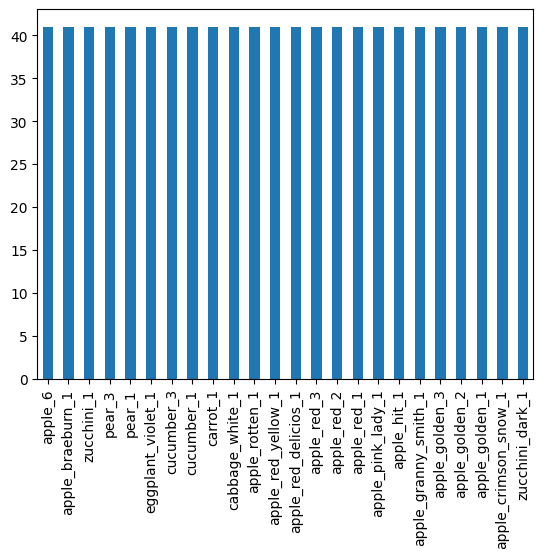

In [31]:
_ = sample['label'].value_counts().plot(kind='bar')
plt.show()

**From above figure one can conclude that sample dataset is balanced.**

In [32]:
X_raw = sample.drop(['label'], axis = 1, inplace = False)
y =sample['label']

In [33]:
arr = X_raw.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(arr)
X = pd.DataFrame(x_scaled)

In [49]:
X.max()

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
779    1.0
780    1.0
781    1.0
782    1.0
783    1.0
Length: 784, dtype: float64

#**PCA for data visualization**

we convert 784 dimensional data into 2 dimensional to visualize the data in 2D

In [35]:
y1=sample[["label"]]
y1.reset_index(drop=True,inplace=True)
pca = PCA(n_components = 2)
principal_components = pca.fit_transform(X)
principal_DF = pd.DataFrame(data = principal_components, columns = ['component1', 'component2'])
#principal_DF.concat(sample["label"]).values
final_DF = pd.concat( [principal_DF,y1], axis = 1,ignore_index=True)
final_DF.columns=["component1","component2","label"]
final_DF

,component1,component2,label
0,0.721612,0.594441,apple_6
1,1.587031,0.696880,apple_6
2,1.703273,0.820149,apple_6
3,1.556194,0.819942,apple_6
4,1.299739,1.742661,apple_6
...,...,...,...
979,-5.975205,0.696351,zucchini_dark_1
980,-1.058539,-1.838411,zucchini_dark_1
981,-4.626951,1.993927,zucchini_dark_1
982,-3.060745,5.684284,zucchini_dark_1


['#10AEFD', '#DB9758', '#F71252', '#07981E', '#6985B5', '#ECD75A', '#FB8B34', '#8E1730', '#52099B', '#119D58']


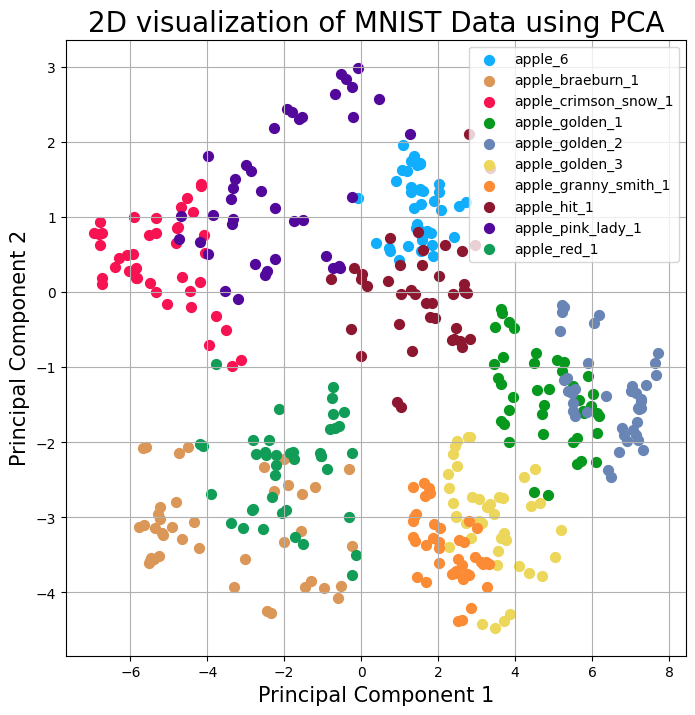

In [37]:
fig = plt.figure(figsize = (8,8))
ax = plt.subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2D visualization of MNIST Data using PCA', fontsize = 20)

targets = list(sample['label'].unique())
random.seed(10)
colors = []
for i in range(10):
    colors.append('#%06X' % randint(0, 0xFFFFFF))
print(colors)
for target, color in zip(targets,colors):
    indicesToKeep = final_DF['label'] == target
    ax.scatter(final_DF.loc[indicesToKeep, 'component1'], final_DF.loc[indicesToKeep,'component2'], c = color, s=50)
ax.legend(targets)
ax.grid()

Divide sample data into 3 parts

1. Train - To calculate nearest neighbors

2. cross-validation: To find optimal value of k (Hyperparameter)

3. Test: To test final accuracy of the model

In [38]:
X_1, X_test, y_1, y_test = train_test_split(X,y,test_size = 0.25, random_state = 10)
X_train, X_cv, y_train, y_cv = train_test_split(X_1,y_1,test_size = 0.20, random_state = 10)
print(X_train.shape, X_test.shape, X_cv. shape, y_train.shape, y_test.shape, y_cv.shape)

(590, 784) (246, 784) (148, 784) (590,) (246,) (148,)


#**SVM for Sample Dataset**

In [39]:
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [40]:
svm_model = GridSearchCV(SVC(), params_grid, cv=5)
svm_model.fit(X_1, y_1)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])

In [41]:
svm_model.best_estimator_

SVC(C=100, gamma=0.001)

In [42]:
svm_model.best_score_

0.9620702334988049

In [43]:
svm_model.cv_results_

{'mean_fit_time': array([0.3834456 , 0.15422239, 0.08677077, 0.13580623, 0.09597626,
        0.11742492, 0.13593774, 0.13498621, 0.09197779, 0.0755887 ,
        0.07764473, 0.07414451]),
 'std_fit_time': array([0.08979948, 0.00409106, 0.00255384, 0.00710924, 0.02213984,
        0.01486155, 0.01488161, 0.01066381, 0.02661647, 0.00392067,
        0.00416192, 0.00124035]),
 'mean_score_time': array([0.19408064, 0.06726742, 0.06306005, 0.06823492, 0.07097359,
        0.08894601, 0.09166799, 0.1057158 , 0.04863219, 0.03447165,
        0.03470173, 0.03558078]),
 'std_score_time': array([0.06339647, 0.00466718, 0.00242084, 0.00318592, 0.01514536,
        0.01260636, 0.00341955, 0.01735159, 0.02403823, 0.00092366,
        0.00130486, 0.00302546]),
 'param_C': masked_array(data=[1, 1, 10, 10, 100, 100, 1000, 1000, 1, 10, 100, 1000],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value='?',
             dt

In [44]:
bestModel = svm_model.best_estimator_
bestModel.fit(X_train,y_train)
yPred = bestModel.predict(X_test)
accuracy = accuracy_score(y_test,yPred)

In [45]:
print("svm accuracy = ",accuracy)

svm accuracy =  0.926829268292683


**SVM Accuracy for Sample dataset is 92.6%.**